In [18]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scipy
import scipy.stats
from scipy.stats import norm
import math

#TODO
1) Find a way to get implied vol market (so can price w/ black scholes)
2) Find a way to constantly get and store greeks
3) Constantly trade straddles/strangles based on greeks?
4) When IV swings crazy think of switching strategies
5) Think about live params to change in rounds
 -maybe an pre-done offset to calc implied vol that changes?
 -a change to loosen up risk and go wild?
 -penny trade button?

RISK LIMITS
Delta: 2000
Gamma: 5000
Vega: 10000000
Theta: 5000

INTEREST RATE = 0

In [6]:
price_paths = pd.read_pickle("xchange/data/case2/pricespaths.pickle")
training_price_paths = pd.read_csv('xchange/data/case2/training_pricepaths.csv').drop('Unnamed: 0', axis=1)

training_price_paths

,underlying,call65,call70,call75,call80,call85,call90,call95,call100,call105,...,put90,put95,put100,put105,put110,put115,put120,put125,put130,put135
0,100.000000,35.436537,30.436449,25.465460,20.544501,15.718957,11.091298,6.883928,3.493461,1.333979,...,1.091298,1.883928,3.493461,6.333979,10.375479,15.090290,20.025352,25.011182,30.008593,35.010526
1,99.703351,35.117638,30.116325,25.143759,20.221087,15.395046,10.773197,6.591873,3.268877,1.212482,...,1.069846,1.888522,3.565526,6.509131,10.632709,15.380026,20.322307,25.309459,30.307651,35.311125
2,99.781739,35.246585,30.252950,25.291467,20.385660,15.585513,11.000335,6.856841,3.536347,1.409663,...,1.218595,2.075101,3.754608,6.627924,10.649909,15.334966,20.254847,25.235405,30.231430,35.233703
3,99.989922,35.412877,30.423416,25.464844,20.560375,15.759372,11.169538,7.013417,3.664809,1.492569,...,1.179616,2.023495,3.674888,6.502648,10.479730,15.139596,20.050467,25.028339,30.023364,35.024824
4,99.348765,34.765348,29.783212,24.834189,19.944124,15.167839,10.623611,6.550014,3.329964,1.305116,...,1.274847,2.201250,3.981199,6.956351,11.042635,15.753561,20.681516,25.664342,30.660513,35.661443
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
596,100.032705,35.043239,30.047080,25.055534,20.076258,15.133960,10.312569,5.876522,2.432486,0.601069,...,0.279864,0.843816,2.399781,5.568363,10.044239,14.972941,19.967656,24.967330,29.967303,34.967299
597,100.878248,35.889777,30.893417,25.901330,20.920246,15.971332,11.125318,6.606533,2.957641,0.838377,...,0.247069,0.728284,2.079392,4.960129,9.253432,14.134146,19.122762,24.121870,29.121781,34.121768
598,100.644919,35.659095,30.663181,25.672049,20.693025,15.748823,10.914257,6.423055,2.829666,0.781541,...,0.269338,0.778136,2.184747,5.136623,9.473957,14.366037,19.355988,24.355194,29.355112,34.355101
599,101.390634,36.407339,31.410827,26.418535,21.436438,16.482656,11.616822,7.032380,3.233859,0.935217,...,0.226189,0.641746,1.843225,4.544583,8.753137,13.621763,18.610260,23.609462,28.609390,33.609381


In [ ]:
def black_scholes(self, call, S, K, T, r, sigma):
        d1 = (np.log(S / K) + (r + 0.5 * sigma ** 2) * T) / (sigma * np.sqrt(T))
        d2 = d1 - sigma * np.sqrt(T)
        if call:
            return S * norm.cdf(d1) - K * np.exp(-r * T) * norm.cdf(d2)
        else:
            return K * np.exp(-r * T) * norm.cdf(-d2) - S * norm.cdf(-d1)

Visualizing Price Movements of Underlying

Text(0.5, 1.0, 'Price Paths')

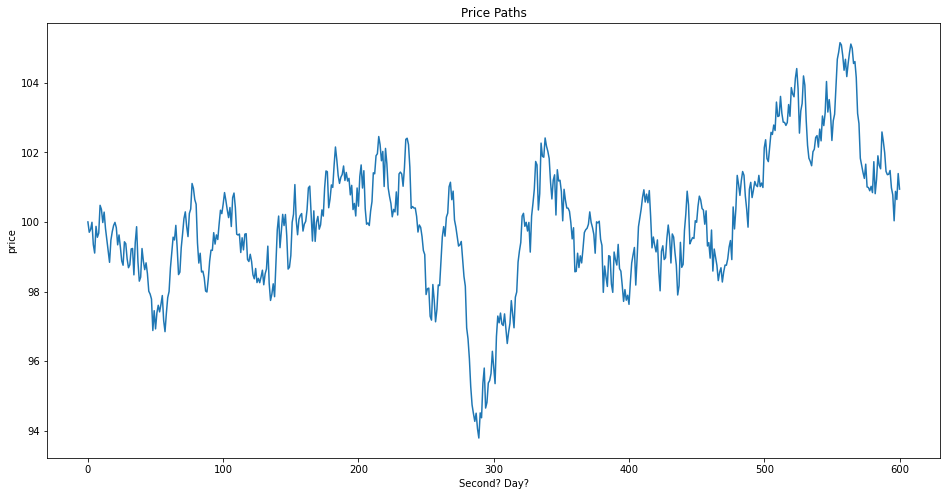

In [17]:
plt.figure(figsize=(16,8))
plt.plot(training_price_paths['underlying'])
plt.ylabel("price")
plt.xlabel('Second? Day?')
plt.title('Price Paths')

#ranges up +- 4%, little wild.

Visualizing Pricing Path of Calls/Puts

Text(0.5, 1.0, 'Put Price Paths')

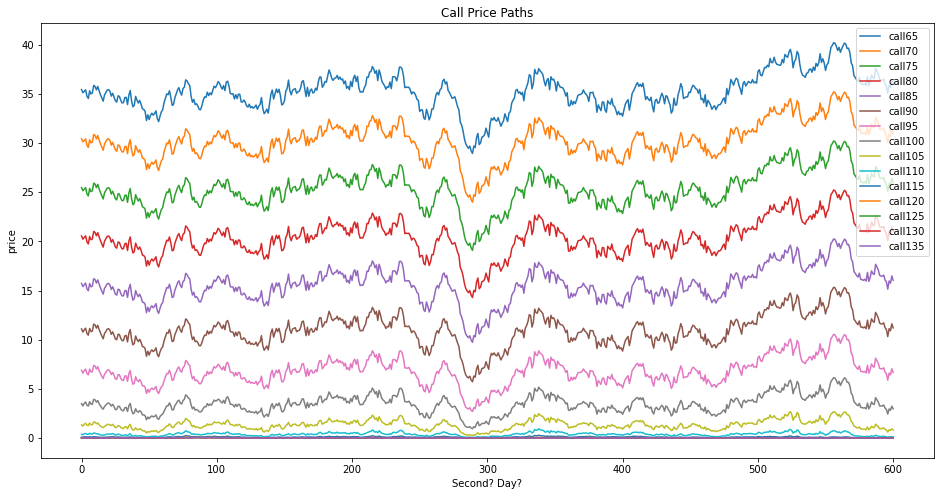

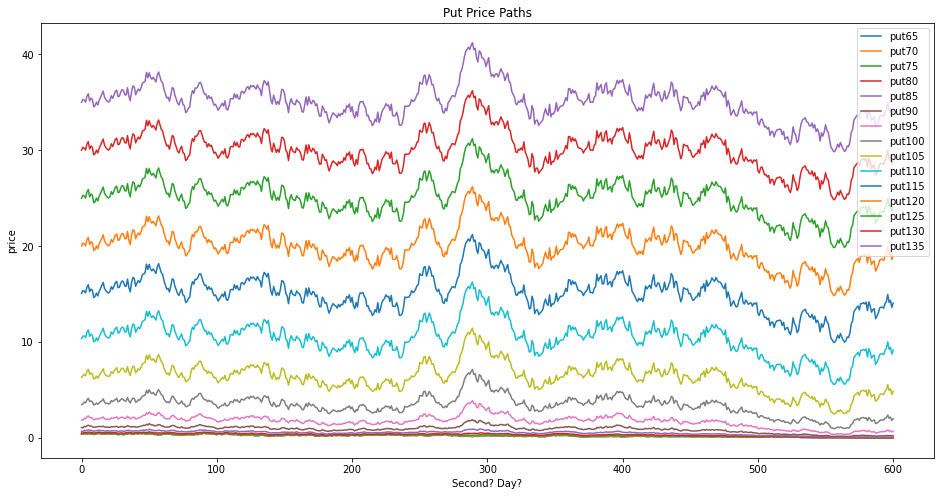

In [16]:
plt.figure(figsize=(16,8))
strikes = np.arange(65,140,5)
for strike in strikes:
    plt.plot(training_price_paths['call'+str(strike)], label = 'call'+str(strike))
plt.legend()
plt.ylabel("price")
plt.xlabel('Second? Day?')
plt.title('Call Price Paths')

plt.figure(figsize=(16,8))
for strike in strikes:
    plt.plot(training_price_paths['put'+str(strike)], label = 'put'+str(strike))
plt.legend()
plt.ylabel("price")
plt.xlabel('Second? Day?')
plt.title('Put Price Paths')

Hull Pgs.
327(vol stock), 341(IV), 399(Greeks), 431(vol :) 

Notes Greeks- there is prob a package that does all this but whatever
------
Delta: Change in option price as underlying changes price
For European stock option, 
    delta(call) = N(d1)   
    delta(put) = N(d1)-1
Theta: rate of change of val of portfolio in relation to passsage of time
N'(x) = (1/sqrt(2pi))e^(-(x^2)/2)
    theta(call) = -(SN'(d1)(sigma))/(2sqrt(T)) - rKe^(-rT)N(d2)
    theta(put)  = = -(SN'(d1)(sigma))/(2sqrt(T)) + rKe^(-rT)N(d2)
Gamma: Rate of Change of delta as underlying changes prices.
    gamma(call/put) = N'(d1)/S(sigma_(sqrt(T))

These three have a relationship

Vega: change in val port w/ respect to vol of underlying asset. High mag vega means sensitive to small chanages in vol. 

IRL, ppl shoot for 0 delta. delta hedge maybe.


Notes Volatility, IV, Smiles

IRL, ppll allow vol to depend on strike and time to maturity.
Vol Smie is relationship b/t IV and strikke, which depends on current price of asset. Implied volatility tends to be an increasing function of maturity when short-dated volatilities are historically low.

On IV: "\[traders\] have developed procedures for using the volatilities implied by the prices of actively traded options to estimate volatilities for other options."

Use Black-Scholes To input vol (be smart about it!)